# Some First-Pass Plots
##### Zoheyr Doctor, 07/15/15

Import functions and settings:

In [1]:
import numpy as np
from glob import glob

import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

Grab the data from the text files and create necessary selectors.  Loop over the simulation files and the data files.  To qualify as a potential trigger observation (PTO), an observation must satisfy:
##### 1) 30.5 < zp < 34.0
#####2) -.5 < zp_fwhm_upper < 2.0
#####3) photprob > 0.5
#####4) photflag > 1 (ie. it's 4096)
To get a full-blown trigger, i and z PTOs must satisfy:
#####1) i and z PTO must be on the same night for shallow fields.  For deep fields allow the PTOs to be separated by max 1 night.
#####2) For simulated data, at least one of the two PTOs must have an SNR > 5 
As a first pass, we'll require that i and z band observations exist exactly 7 days after a trigger for a "detection"

In [2]:
filetypes = ['sim','data']
paths = ["../ZD_KNDES_TEST/*DAT","../DESY1_numepoch1_iz_real_text/*.dat"]
fieldtypes = ['shallow','deep']
dict1 = dict()
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[filetype+'_'+fieldtype] = trigColors.trigColors(paths[f],filetype,fieldtype)
        dict1[filetype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[filetype+'_'+fieldtype]['cnites'],dict1[filetype+'_'+fieldtype]['zbandinfo'],dict1[filetype+'_'+fieldtype]['ibandinfo'])

des_utils.py:284: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
des_utils.py:306: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
trigColors.py:45: RuntimeWarning: invalid value encountered in log
  zmag = -2.5*np.log(zbandinfo[i][2][zsellist[i]][0])
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
des_utils.py:88: RuntimeWarning: invalid value encountered in greater_equal
  SNR_selector[i] = info[3] >= SNRmin


Let's plot the colors of data versus the sims for the two fields and count the number of triggers and detections

sim shallow
number of objects:  1001
number of triggers:  679
number of detections:  197
sim deep
number of objects:  1001
number of triggers:  307
number of detections:  43
data shallow
number of objects:  3637
number of triggers:  1720
number of detections:  923
data deep
number of objects:  3637
number of triggers:  544
number of detections:  0


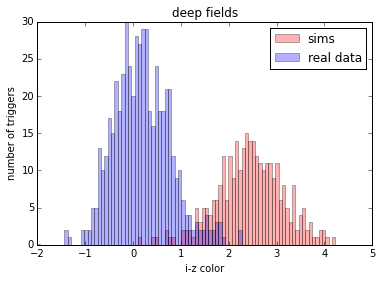

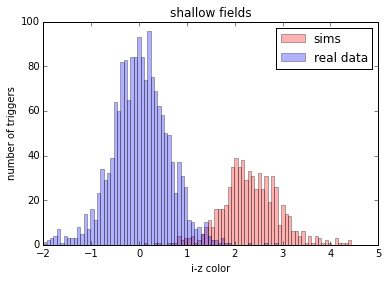

In [3]:
plt.figure();
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool')]
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool')]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool')]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool')]
plt.hist(sim_deep_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_deep_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.figure();
plt.hist(sim_shallow_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_shallow_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'])
        #count = 0
        #for i in range(0,len((dict1[filetype+'_'+fieldtype]['trigs']))):
        #    if dict1[filetype+'_'+fieldtype]['trigs'][i] and dict1[filetype+'_'+fieldtype]['detections'][i]:
        #        count = count+1
        dets = np.sum(dict1[filetype+'_'+fieldtype]['trigs'] & dict1[filetype+'_'+fieldtype]['detections'])
        print 'number of detections: ', dets

## Redshift Cut

Now we'll perform a first cut.  We want to remove objects associated with galaxies that are too far away.  Let's cut out everything with photoZ > 0.1

sim shallow
number of objects:  1001
number of triggers:  679
number of detections:  197
sim deep
number of objects:  1001
number of triggers:  307
number of detections:  43
data shallow
number of objects:  3637
number of triggers:  748
number of detections:  401
data deep
number of objects:  3637
number of triggers:  234
number of detections:  0


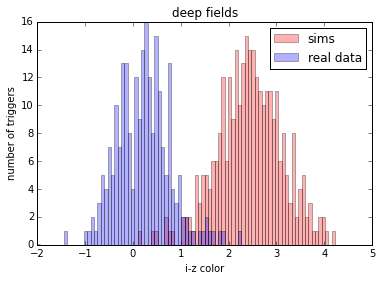

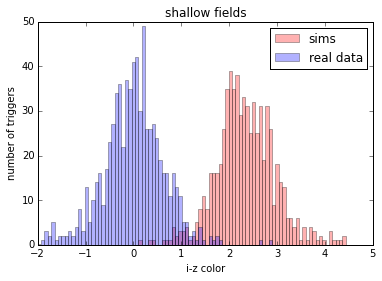

In [4]:
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & # only objects that triggered
                                              (~dict1['sim_deep']['photoZcutsel'])] # only objects that have photoZ < .1
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel'])]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                                    (~dict1['sim_shallow']['photoZcutsel'])]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool')& 
                                                      (~dict1['data_shallow']['photoZcutsel'])]
plt.figure();
plt.hist(sim_deep_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_deep_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.figure();
plt.hist(sim_shallow_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_shallow_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & ~dict1[filetype+'_'+fieldtype]['photoZcutsel'])
        count = np.sum(dict1[filetype+'_'+fieldtype]['trigs'] & dict1[filetype+'_'+fieldtype]['detections'] & ~dict1[filetype+'_'+fieldtype]['photoZcutsel'])
        print 'number of detections: ', count

## Long-Timescale Cut

Let's look at the maximum time separation between triggers for each object.  Since KN have shorter timescales than SN, we should be able to cut things that have triggers that are sufficiently spaced in time.  First we get the list of maximum nites between triggers:

In [5]:
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        nitediff = np.zeros(len(dict1[filetype+'_'+fieldtype]['cnites']))
        #multitrig = np.zeros(len(dict1[filetype+'_'+fieldtype]['cnites']),dtype = 'bool')
        for i in range(0,len(dict1[filetype+'_'+fieldtype]['cnites'])):
            if dict1[filetype+'_'+fieldtype]['cnites'][i].size == 0:
                nitediff[i] = -1
            else:
                nitediff[i] = dict1[filetype+'_'+fieldtype]['cnites'][i].max() - dict1[filetype+'_'+fieldtype]['cnites'][i].min()
            #multitrig[i] = nitediff[i] <= 10 
        dict1[filetype+'_'+fieldtype]['nitediff'] = nitediff
        #dict1[filetype+'_'+fieldtype]['multitrig'] = multitrig

Now let's plot histograms of the timescales

maximum separation between triggers for all simulated shallow-field objects:  14.0
maximum separation between triggers for all simulated deep-field objects:  16.0


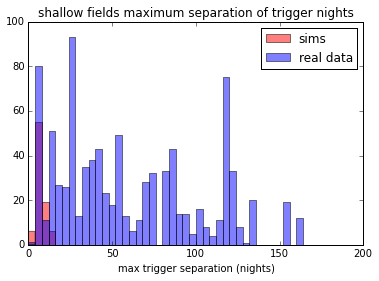

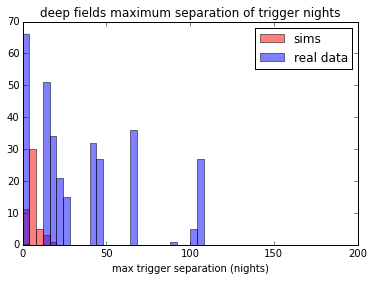

In [6]:
plt.figure();
plt.hist(dict1['sim_shallow']['nitediff'][dict1['sim_shallow']['nitediff'] >0],color='r',alpha = 0.5,bins=50,range = (0,200));
plt.hist(dict1['data_shallow']['nitediff'][dict1['data_shallow']['nitediff'] >0],color='b',alpha = 0.5,bins=50,range = (0,200));
plt.xlabel('max trigger separation (nights)')
plt.title('shallow fields maximum separation of trigger nights')
plt.legend(['sims','real data']);
plt.figure();
plt.hist(dict1['sim_deep']['nitediff'][dict1['sim_deep']['nitediff'] >0],color='r',alpha = 0.5,bins=50,range = (0,200));
plt.hist(dict1['data_deep']['nitediff'][dict1['data_deep']['nitediff'] >0],color='b',alpha = 0.5,bins=50,range = (0,200));
plt.title('deep fields maximum separation of trigger nights')
plt.xlabel('max trigger separation (nights)')
plt.legend(['sims','real data']);
maxsimtrigsep_shallow = np.max(dict1['sim_shallow']['nitediff'][dict1['sim_shallow']['nitediff'] >0])
maxsimtrigsep_deep = np.max(dict1['sim_deep']['nitediff'][dict1['sim_deep']['nitediff'] >0])
print 'maximum separation between triggers for all simulated shallow-field objects: ',maxsimtrigsep_shallow
print 'maximum separation between triggers for all simulated deep-field objects: ',maxsimtrigsep_deep

Of the KN that were simulated, the maximum time seen between triggers for a KN is 16 days.  So let's cut everything that has triggers spaced by over 20 days.

In [7]:
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        multitrig = np.zeros(len(dict1[filetype+'_'+fieldtype]['cnites']),dtype = 'bool')
        for i in range(0,len(dict1[filetype+'_'+fieldtype]['cnites'])):
            multitrig[i] = dict1[filetype+'_'+fieldtype]['nitediff'][i] <= 20
        dict1[filetype+'_'+fieldtype]['multitrig'] = multitrig

Now let's plot our colors with the cut:

sim shallow
number of objects:  1001
number of triggers:  679
number of detections:  197
sim deep
number of objects:  1001
number of triggers:  307
number of detections:  43
data shallow
number of objects:  3637
number of triggers:  411
number of detections:  122
data deep
number of objects:  3637
number of triggers:  146
number of detections:  0


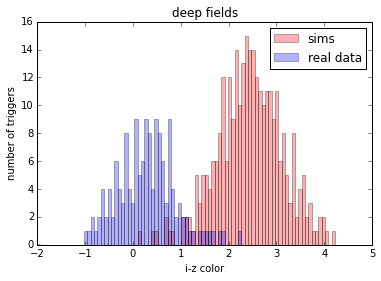

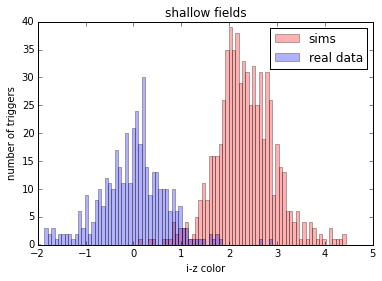

In [8]:
plt.figure();
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                                              (~dict1['sim_deep']['photoZcutsel']) & 
                                              dict1['sim_deep']['multitrig']]
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                dict1['data_deep']['multitrig']]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                               (~dict1['sim_shallow']['photoZcutsel']) & 
                                               dict1['sim_shallow']['multitrig']]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                                     (~dict1['data_shallow']['photoZcutsel']) & 
                                                     dict1['data_shallow']['multitrig']]
plt.hist(sim_deep_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_deep_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.figure();
plt.hist(sim_shallow_colors,bins=100,alpha=0.3,color='r',range=(-2,5));
plt.hist(data_shallow_colors,bins=100,alpha=0.3,color='b',range=(-2,5));
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'])
        print 'number of detections: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'] &
                                              dict1[filetype+'_'+fieldtype]['detections'])

## Follow-Up Cut

We usually will require a follow-up observation to a trigger in order for us to use that trigger to identify KN.  So, let's just plot the colors of objects that had the trigger and follow-up observation.  The cuts we used above will still be in effect, so none of the numbers should change from above

sim shallow
number of objects:  1001
number of triggers:  679
number of detections:  197
sim deep
number of objects:  1001
number of triggers:  307
number of detections:  43
data shallow
number of objects:  3637
number of triggers:  411
number of detections:  122
data deep
number of objects:  3637
number of triggers:  146
number of detections:  0


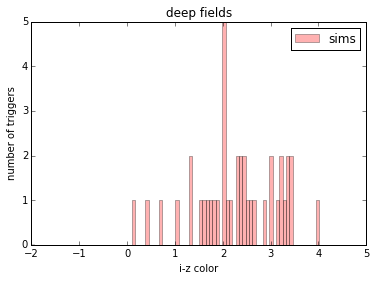

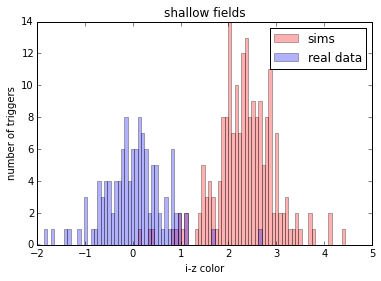

In [9]:
plt.figure();
sim_deep_detect = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                            (~dict1['sim_deep']['photoZcutsel']) & 
                            dict1['sim_deep']['multitrig'] & 
                            dict1['sim_deep']['detections'].astype('bool') ]
data_deep_detect = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                dict1['data_deep']['multitrig'] & 
                                                dict1['data_deep']['detections'].astype('bool')]
try:
    plt.hist(sim_deep_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_deep_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.figure();
sim_shallow_detect = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                                    (~dict1['sim_shallow']['photoZcutsel']) & 
                                                    dict1['sim_shallow']['multitrig'] & 
                                                    dict1['sim_shallow']['detections'].astype('bool')]
data_shallow_detect = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                (~dict1['data_shallow']['photoZcutsel']) & 
                                dict1['data_shallow']['multitrig'] & 
                                dict1['data_shallow']['detections'].astype('bool')]
try:
    plt.hist(sim_shallow_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_shallow_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'])
        print 'number of detections: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'] &
                                              dict1[filetype+'_'+fieldtype]['detections'])

## Refined Follow-Up Cut

The "detections" we have been quoting above all required a follow-up observation exactly 7 days after a trigger observation.  This is too strong a restriction.  We really need a follow-up only between 3 and 10 days after a trigger.  Specifically, we need at least one i observation within 3-10 days after the trigger and at least one z observation within 3-10 days after the trigger. First we set our detection booleans according to this looser constraint:

In [10]:
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        dict1[filetype+'_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1[filetype+'_'+fieldtype]['cnites'],
                                                                                         dict1[filetype+'_'+fieldtype]['zbandinfo'],
                                                                                         dict1[filetype+'_'+fieldtype]['ibandinfo'],
                                                                                        3,10,1)

Now we'll plot the trigger color histograms of detected objects just like above.  Note that the photoZ cut is still in effect:

sim shallow
number of objects:  1001
number of triggers:  679
number of detections:  607
sim deep
number of objects:  1001
number of triggers:  307
number of detections:  268
data shallow
number of objects:  3637
number of triggers:  411
number of detections:  365
data deep
number of objects:  3637
number of triggers:  146
number of detections:  133


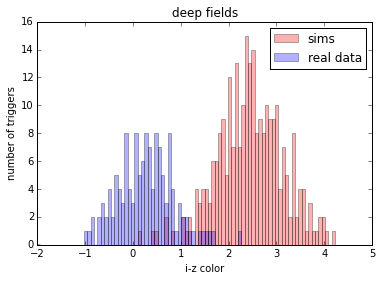

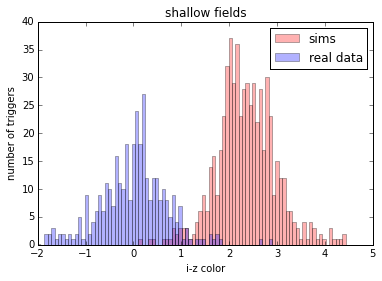

In [11]:
plt.figure();
sim_deep_detect = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                            (~dict1['sim_deep']['photoZcutsel']) & 
                            dict1['sim_deep']['multitrig'] & 
                            dict1['sim_deep']['detections'].astype('bool') ]
data_deep_detect = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                dict1['data_deep']['multitrig'] & 
                                                dict1['data_deep']['detections'].astype('bool')]
try:
    plt.hist(sim_deep_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_deep_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('deep fields');
plt.legend(['sims','real data']);
plt.figure();
sim_shallow_detect = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                                    (~dict1['sim_shallow']['photoZcutsel']) & 
                                                    dict1['sim_shallow']['multitrig'] & 
                                                    dict1['sim_shallow']['detections'].astype('bool')]
data_shallow_detect = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                (~dict1['data_shallow']['photoZcutsel']) & 
                                dict1['data_shallow']['multitrig'] & 
                                dict1['data_shallow']['detections'].astype('bool')]
try:
    plt.hist(sim_shallow_detect,bins=100,alpha=0.3,color='r',range=(-2,5));
except ValueError:
    pass
try:
    plt.hist(data_shallow_detect,bins=100,alpha=0.3,color='b',range=(-2,5));
except ValueError:
    pass
plt.ylabel('number of triggers')
plt.xlabel('i-z color')
plt.title('shallow fields');
plt.legend(['sims','real data']);
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        print filetype, fieldtype
        print 'number of objects: ', len(dict1[filetype+'_'+fieldtype]['zbandinfo'])
        print 'number of triggers: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'])
        print 'number of detections: ', np.sum(dict1[filetype+'_'+fieldtype]['trigs'].astype('bool') & 
                                             ~dict1[filetype+'_'+fieldtype]['photoZcutsel'] &
                                            dict1[filetype+'_'+fieldtype]['multitrig'] &
                                              dict1[filetype+'_'+fieldtype]['detections'])

## Color-timescale scatter plots

If an object has multiple triggers, we want to plot the i-z color of the first trigger versus the maximum time separation between triggers.

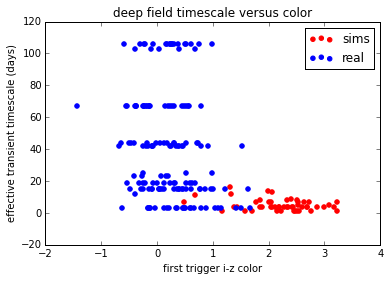

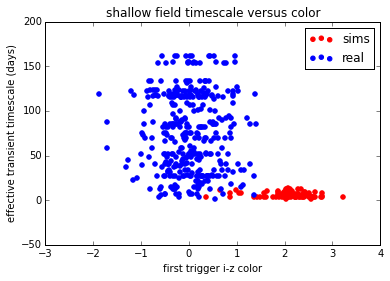

In [12]:
plt.figure();
sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool') & 
                                              (~dict1['sim_deep']['photoZcutsel']) & 
                                              (dict1['sim_deep']['nitediff']>0)]
data_deep_colors = dict1['data_deep']['colors'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                (dict1['data_deep']['nitediff']>0)]
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                               (~dict1['sim_shallow']['photoZcutsel']) & 
                                               (dict1['sim_shallow']['nitediff']>0)]
data_shallow_colors = dict1['data_shallow']['colors'][dict1['data_shallow']['trigs'].astype('bool') & 
                                                     (~dict1['data_shallow']['photoZcutsel']) & 
                                                    (dict1['data_shallow']['nitediff']>0)]
sim_deep_times = dict1['sim_deep']['nitediff'][dict1['sim_deep']['trigs'].astype('bool') & 
                                              (~dict1['sim_deep']['photoZcutsel']) & 
                                              (dict1['sim_deep']['nitediff']>0)]
data_deep_times = dict1['data_deep']['nitediff'][dict1['data_deep']['trigs'].astype('bool') & 
                                                (~dict1['data_deep']['photoZcutsel']) & 
                                                (dict1['data_deep']['nitediff']>0)]
sim_shallow_times = dict1['sim_shallow']['nitediff'][dict1['sim_shallow']['trigs'].astype('bool') & 
                                               (~dict1['sim_shallow']['photoZcutsel']) & 
                                               (dict1['sim_shallow']['nitediff']>0)]
data_shallow_times = dict1['data_shallow']['nitediff'][dict1['data_shallow']['trigs'].astype('bool') & 
                                                     (~dict1['data_shallow']['photoZcutsel']) & 
                                                     (dict1['data_shallow']['nitediff']>0)]
plt.scatter(sim_deep_colors,sim_deep_times,color='r');
plt.scatter(data_deep_colors,data_deep_times,color='b');
plt.title('deep field timescale versus color')
plt.xlabel('first trigger i-z color')
plt.ylabel('effective transient timescale (days)')
plt.legend(['sims','real'])
plt.figure();
plt.scatter(sim_shallow_colors,sim_shallow_times,color='r');
plt.scatter(data_shallow_colors,data_shallow_times,color='b');
plt.title('shallow field timescale versus color')
plt.xlabel('first trigger i-z color')
plt.ylabel('effective transient timescale (days)')
plt.legend(['sims','real'])

In [13]:
reload(des_utils)
for f,filetype in enumerate(filetypes):  
    for n,fieldtype in enumerate(fieldtypes):
        zdetflux,zdetMJD,zdetflags = des_utils.get_detection_info(dict1[filetype+'_'+fieldtype]['cnites'],
                                                dict1[filetype+'_'+fieldtype]['zbandinfo'],
                                                3,10,1)
        idetflux,idetMJD,idetflags = des_utils.get_detection_info(dict1[filetype+'_'+fieldtype]['cnites'],
                                                dict1[filetype+'_'+fieldtype]['ibandinfo'],
                                                3,10,1)
        dict1[filetype+'_'+fieldtype]['zdetflux'] = zdetflux
        dict1[filetype+'_'+fieldtype]['zdetMJD'] = zdetMJD
        dict1[filetype+'_'+fieldtype]['zdetflags'] = zdetflags
        dict1[filetype+'_'+fieldtype]['idetflux'] = idetflux
        dict1[filetype+'_'+fieldtype]['idetMJD'] = idetMJD
        dict1[filetype+'_'+fieldtype]['idetflags'] = idetflags
        dict1[filetype+'_'+fieldtype]['detections'] = idetflags & zdetflags

592
616
252
198


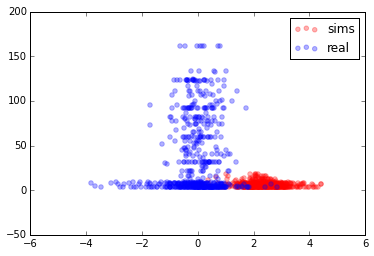

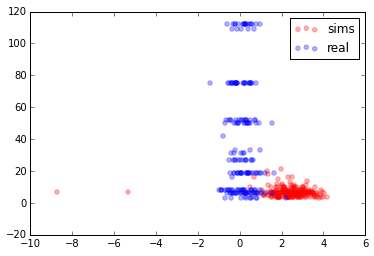

In [43]:
cols = ['r','b']
for n,fieldtype in enumerate(fieldtypes):
    plt.figure();
    for f,filetype in enumerate(filetypes):  
        color = dict1[filetype+'_'+fieldtype]['colors'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                        (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        itime = dict1[filetype+'_'+fieldtype]['idetMJD'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                         (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        ztime = dict1[filetype+'_'+fieldtype]['zdetMJD'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                         (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        trigtimes = dict1[filetype+'_'+fieldtype]['cnites'][dict1[filetype+'_'+fieldtype]['trigs'] &
                                                            (~dict1[filetype+'_'+fieldtype]['photoZcutsel']) &
                                                            dict1[filetype+'_'+fieldtype]['detections']]
        print len(trigtimes)
        trignite = np.empty(len(trigtimes))
        for i in range(0,len(trignite)):
            trignite[i] = trigtimes[i][0]
        time = ztime - trignite
        plt.scatter(color,time,color=cols[f],alpha=0.3)
    plt.legend(['sims','real']);                
                           
                                                            
                                                                  